(32, 35)
(32, 35)
0
1000
2000
3000
4000
Finished Training. 
 MSE: 0.31290464038316984


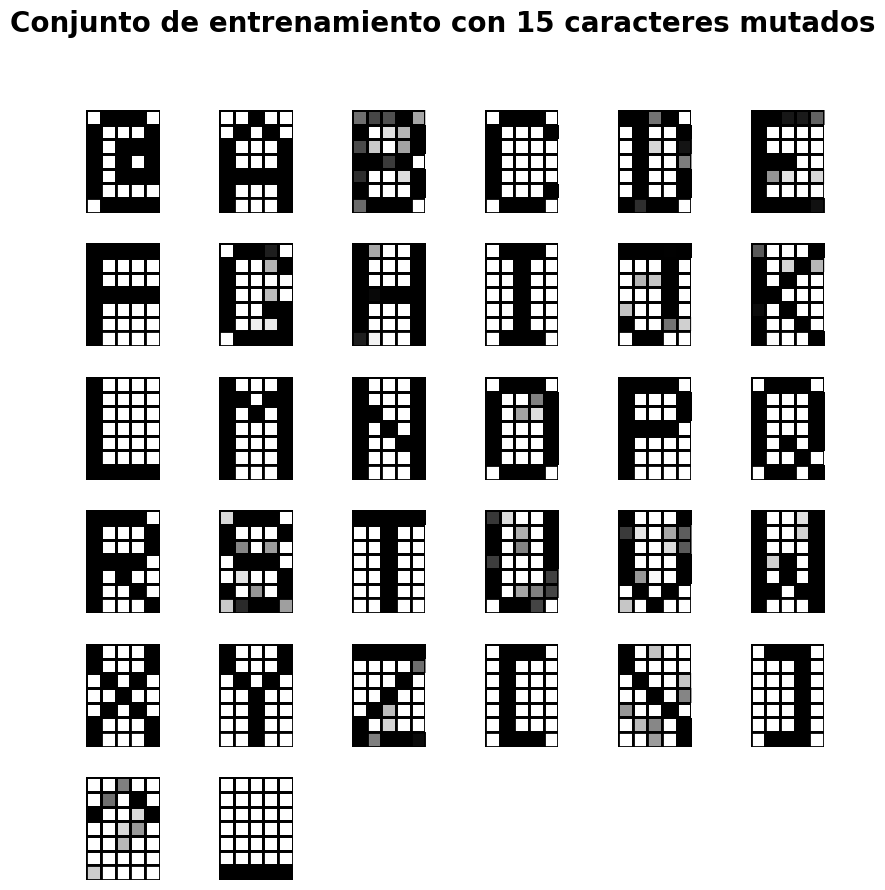

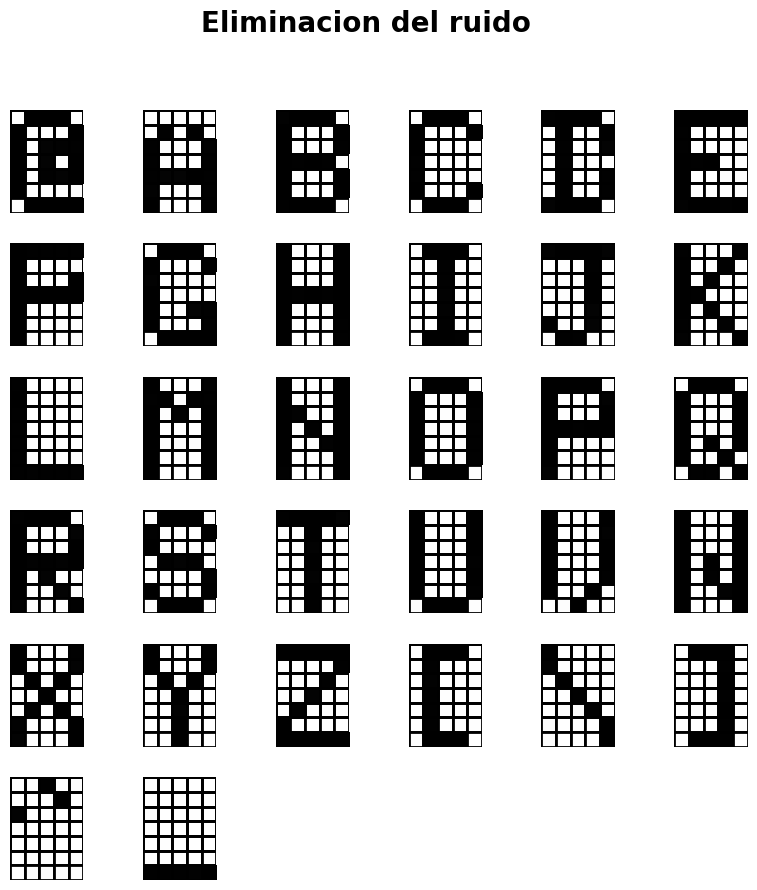

Latent space value:  [0.2105611  0.93366952]  for letter in index  0
Latent space value:  [0.98714455 0.21099826]  for letter in index  1
Latent space value:  [0.02850533 0.79856452]  for letter in index  2
Latent space value:  [0.11997723 0.61707297]  for letter in index  3
Latent space value:  [0.01037636 0.37126122]  for letter in index  4
Latent space value:  [0.41410566 0.6761596 ]  for letter in index  5
Latent space value:  [0.88219336 0.97612952]  for letter in index  6
Latent space value:  [0.21099141 0.62134138]  for letter in index  7
Latent space value:  [0.97152551 0.95029795]  for letter in index  8
Latent space value:  [0.02952009 0.03315457]  for letter in index  9
Latent space value:  [0.19555256 0.30467767]  for letter in index  10
Latent space value:  [0.68428202 0.33673977]  for letter in index  11
Latent space value:  [0.49896415 0.30200908]  for letter in index  12
Latent space value:  [0.99051004 0.51527216]  for letter in index  13
Latent space value:  [0.989779

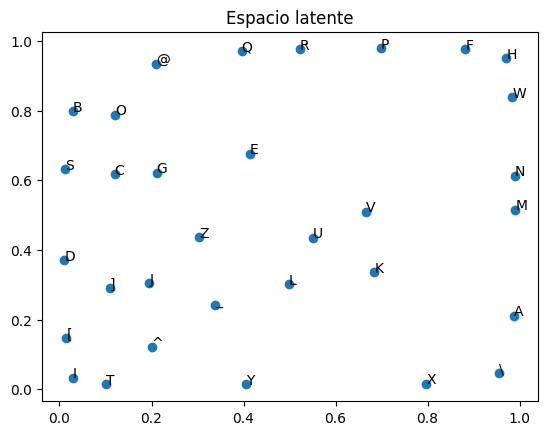

(32, 35)
(32, 35)
0
1000
2000
3000
4000
Finished Training. 
 MSE: 1.1336318096280165


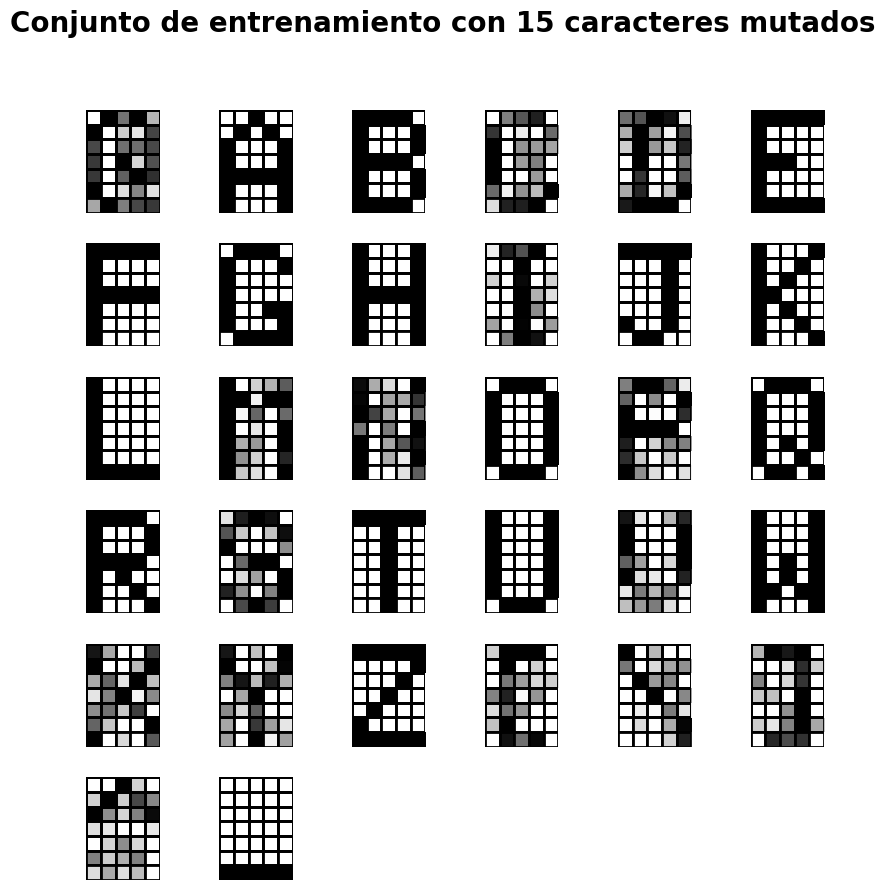

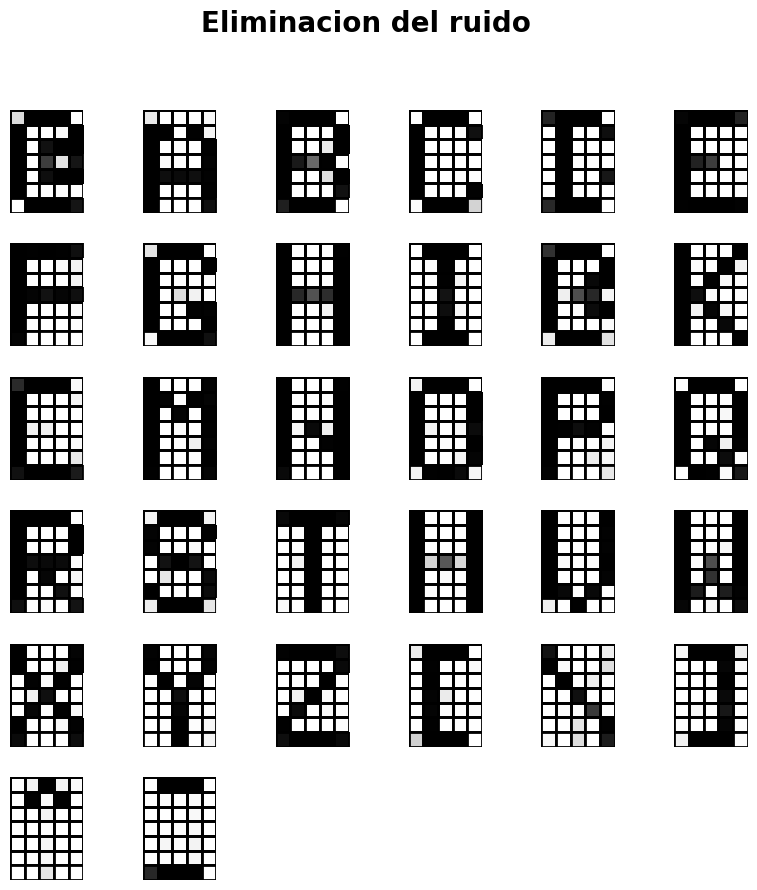

Latent space value:  [0.01149995 0.98654605]  for letter in index  0
Latent space value:  [0.99438112 0.42824322]  for letter in index  1
Latent space value:  [0.01412421 0.81343738]  for letter in index  2
Latent space value:  [0.08941349 0.56310953]  for letter in index  3
Latent space value:  [0.00236362 0.00348194]  for letter in index  4
Latent space value:  [0.00424482 0.4416487 ]  for letter in index  5
Latent space value:  [0.48114215 0.99940417]  for letter in index  6
Latent space value:  [0.0027898  0.61838694]  for letter in index  7
Latent space value:  [0.99557554 0.93331127]  for letter in index  8
Latent space value:  [0.12309719 0.00401112]  for letter in index  9
Latent space value:  [0.01050485 0.90081856]  for letter in index  10
Latent space value:  [0.99693553 0.27589802]  for letter in index  11
Latent space value:  [0.01306181 0.49575475]  for letter in index  12
Latent space value:  [0.99847865 0.6014868 ]  for letter in index  13
Latent space value:  [0.998629

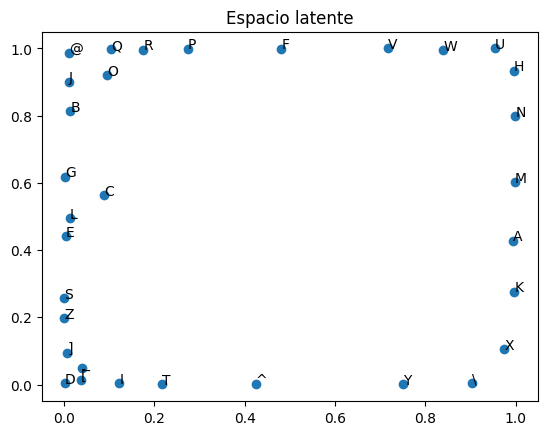

(32, 35)
(32, 35)
0
1000
2000
3000
4000
Finished Training. 
 MSE: 0.6283079868884948


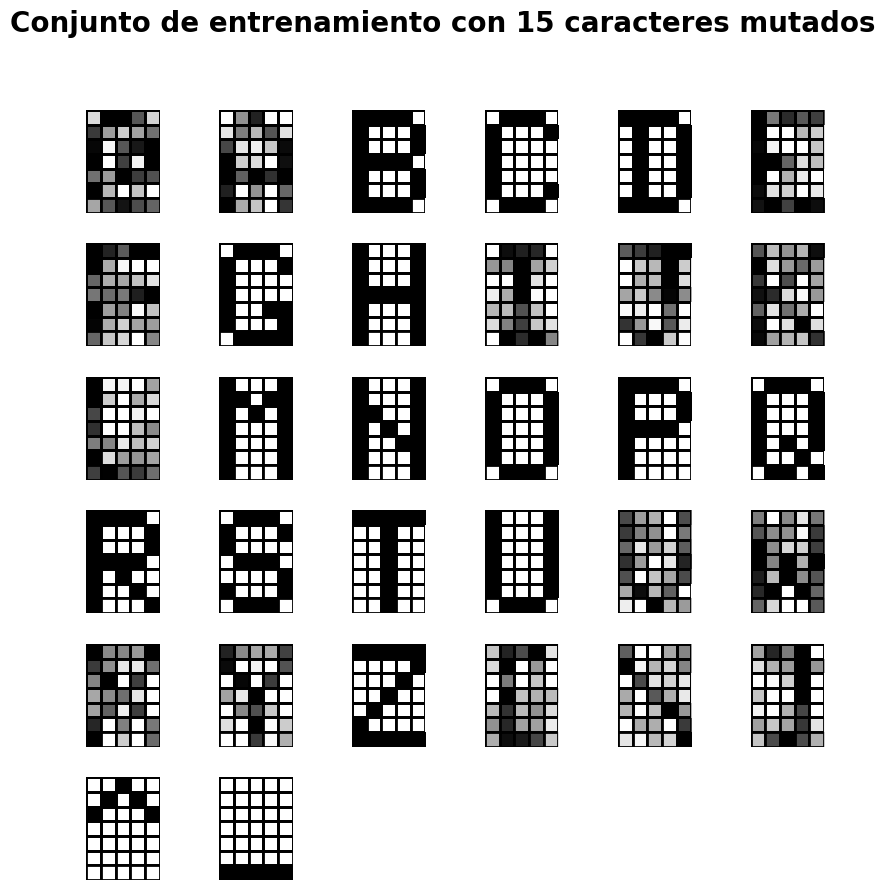

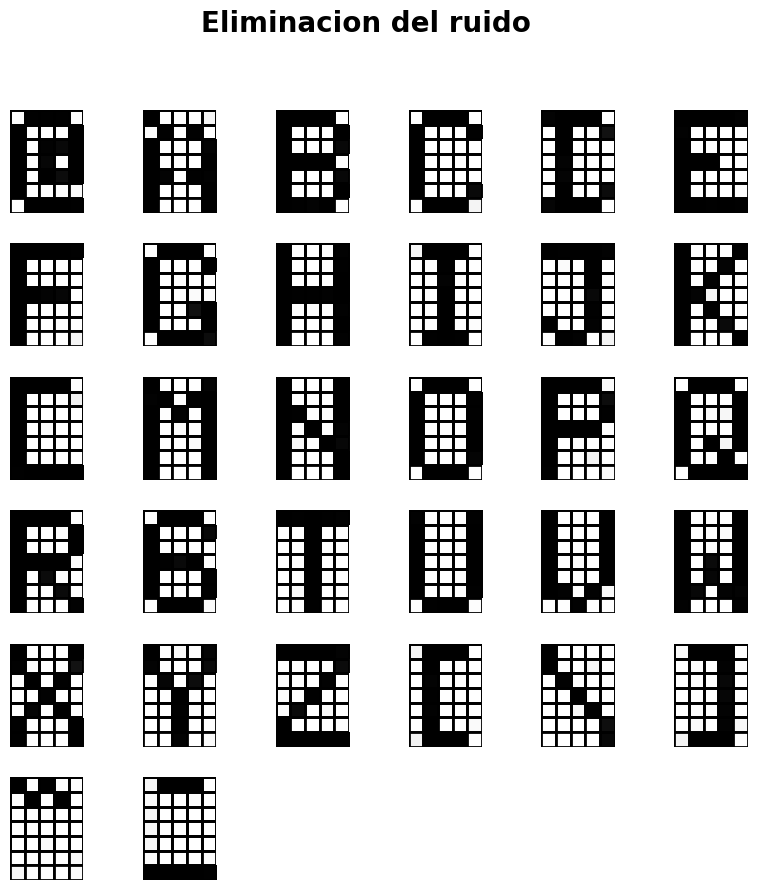

Latent space value:  [0.66833584 0.80563373]  for letter in index  0
Latent space value:  [0.74832796 0.11480675]  for letter in index  1
Latent space value:  [0.42946403 0.64556784]  for letter in index  2
Latent space value:  [0.01717862 0.89822386]  for letter in index  3
Latent space value:  [0.04798929 0.16388421]  for letter in index  4
Latent space value:  [0.33141213 0.46160277]  for letter in index  5
Latent space value:  [0.47046929 0.41628355]  for letter in index  6
Latent space value:  [0.13340203 0.93222523]  for letter in index  7
Latent space value:  [0.76066973 0.37669469]  for letter in index  8
Latent space value:  [0.01262796 0.0259616 ]  for letter in index  9
Latent space value:  [0.28712958 0.18860894]  for letter in index  10
Latent space value:  [0.61845669 0.20336126]  for letter in index  11
Latent space value:  [0.19865857 0.62270991]  for letter in index  12
Latent space value:  [0.97976662 0.16633828]  for letter in index  13
Latent space value:  [0.931623

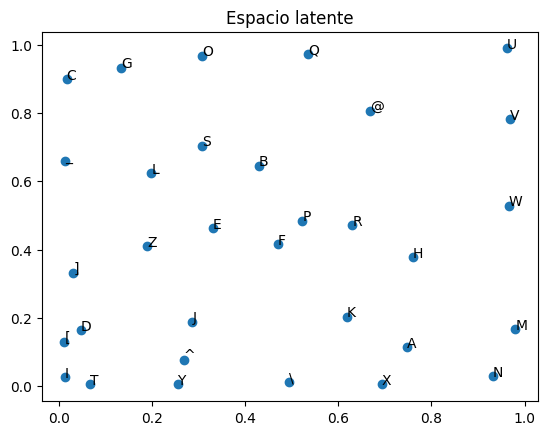

(32, 35)
(32, 35)
0
1000
2000
3000
4000
Finished Training. 
 MSE: 0.3440976061778492


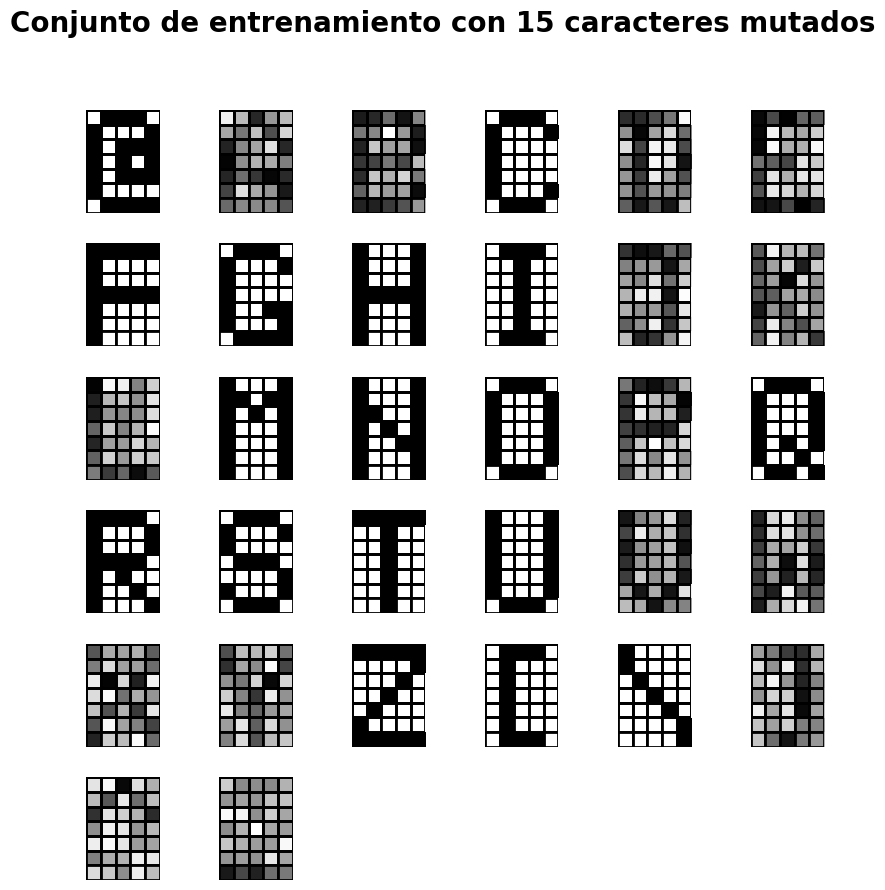

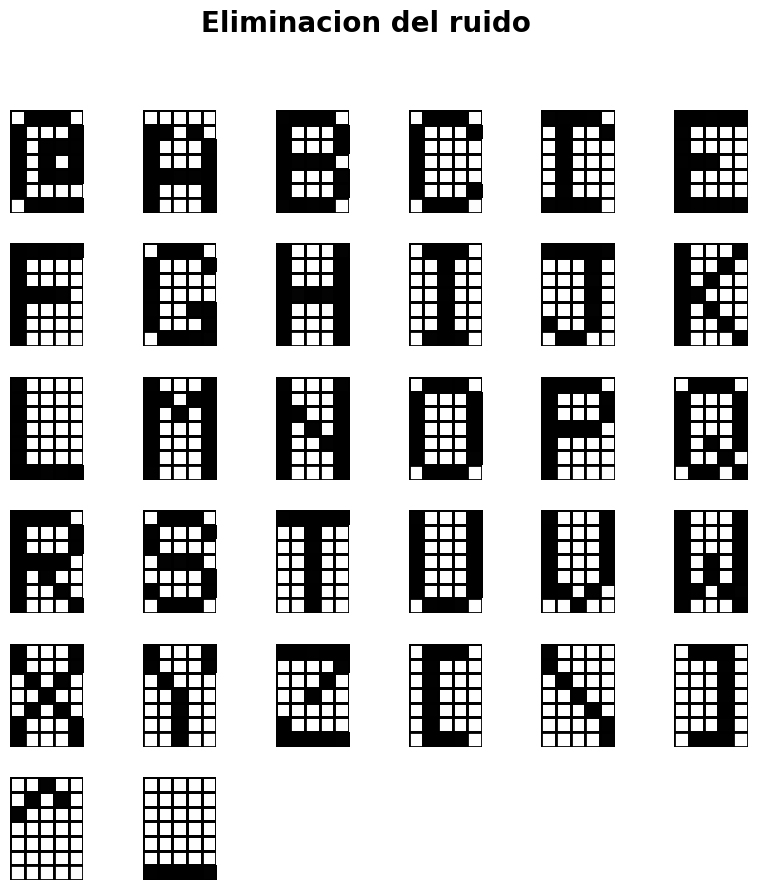

Latent space value:  [0.98986434 0.92048757]  for letter in index  0
Latent space value:  [0.42944246 0.01816153]  for letter in index  1
Latent space value:  [0.605493   0.44616859]  for letter in index  2
Latent space value:  [0.57436277 0.6456686 ]  for letter in index  3
Latent space value:  [0.01659915 0.55307496]  for letter in index  4
Latent space value:  [0.38780299 0.48742093]  for letter in index  5
Latent space value:  [0.43425085 0.38311608]  for letter in index  6
Latent space value:  [0.74612918 0.75267931]  for letter in index  7
Latent space value:  [0.62802557 0.03218035]  for letter in index  8
Latent space value:  [0.02377512 0.98760581]  for letter in index  9
Latent space value:  [0.25633154 0.77260807]  for letter in index  10
Latent space value:  [0.41040011 0.16261899]  for letter in index  11
Latent space value:  [0.30794125 0.3617112 ]  for letter in index  12
Latent space value:  [0.95836837 0.11420943]  for letter in index  13
Latent space value:  [0.961089

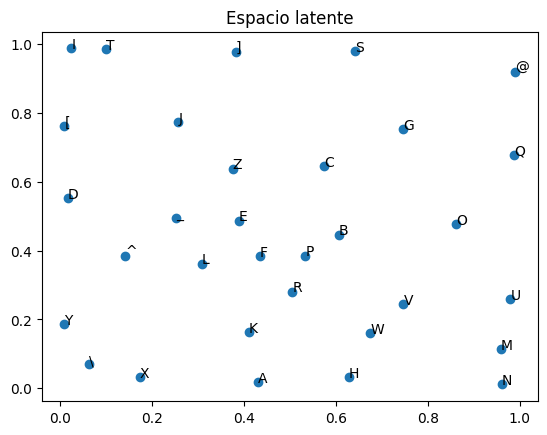

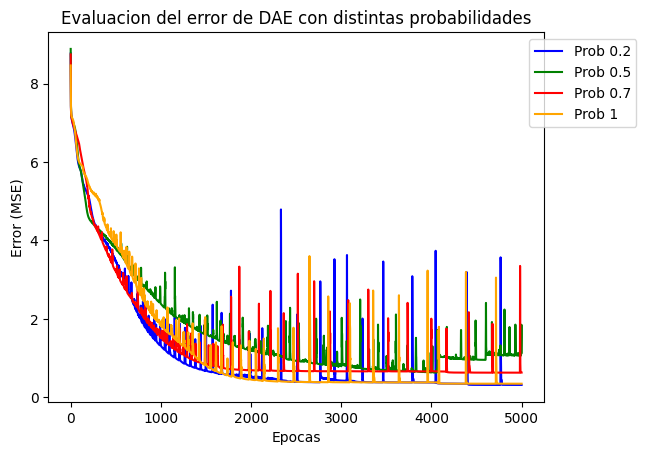

In [1]:
import json
from src.utils import DataConfig, alter_data
from src.autoencoder import Autoencoder
from src.plots import *
from data.font import _font_2, symbols2    

with open('./config_denoising.json', 'r') as f:
    data_config = json.load(f)

c = DataConfig(data_config, _font_2)

MUTATE_PROB = 0.1
CANT_TO_MUTATE = 15
arr_of_errors = []
arr_of_epochs = []
MUTATION=[0.2,0.5,0.7,1]
for i, prob in enumerate(MUTATION):
    mutated_data = alter_data(c.input_data, prob, CANT_TO_MUTATE)
    mutated_data = np.array(list(mutated_data))
    print(c.input_data.shape)
    print(mutated_data.shape)

    autoencoder = Autoencoder(mutated_data, c.input_data, c.latent_space_size,
                            0.001, c.bias, 5000, 1,
                            c.min_error, 2, [20,10], 
                            c.output_activation, c.hidden_activation, c.beta,
                            c.optimizer_method, c.alpha, c.beta1, c.beta2,
                            c.epsilon)
    mse_errors, total_epochs = autoencoder.train()
    arr_of_errors.append(mse_errors)
    arr_of_epochs.append(total_epochs)

    plot_letters(mutated_data, f"Conjunto de entrenamiento con {CANT_TO_MUTATE} caracteres mutados")

    predicted = []
    for x in mutated_data:
        p = autoencoder.predict(x)
        predicted.append(p)
    plot_letters(predicted, "Eliminacion del ruido")


    arr = []
    for j in range(len(mutated_data)):
        value = autoencoder.latent_space(mutated_data[j])
        arr.append(value)
        print("Latent space value: ", value, " for letter in index ", j)

    plot_latent_space(np.array(arr), symbols2)

colors = ['blue', 'green', 'red', 'orange']

fig, ax = plt.subplots()  
for i, arquitectura in enumerate(MUTATION):
    ax.plot(range(arr_of_epochs[i]), arr_of_errors[i], color=colors[i], label=f"Prob {MUTATION[i]}")
ax.set_title('Evaluacion del error de DAE con distintas probabilidades') 
ax.set_xlabel('Epocas') 
ax.set_ylabel('Error (MSE)')  
ax.legend(loc='best', bbox_to_anchor=(1.2, 1.0))  
plt.show() 


0
1000
2000
3000
4000
Finished Training. 
 MSE: 0.8781272013270417
0
1000
2000
3000
4000
Finished Training. 
 MSE: 0.37548021731389064
0
1000
2000
3000
4000
Finished Training. 
 MSE: 0.8907296961360774


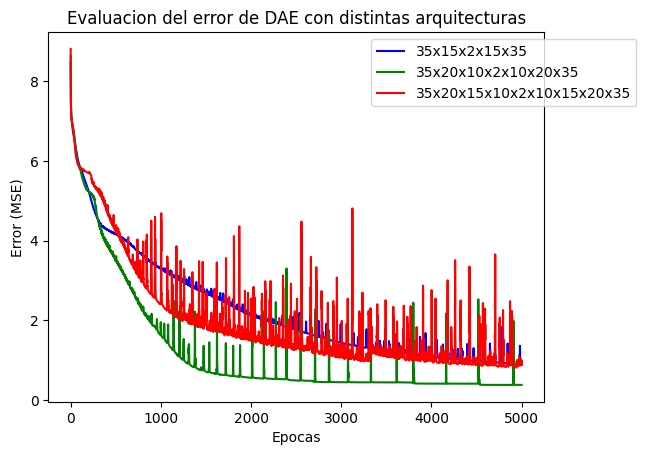

In [2]:
import json
from src.utils import DataConfig, alter_data
from src.autoencoder import Autoencoder
from src.plots import *
from data.font import _font_2    

with open('./config_denoising.json', 'r') as f:
    data_config = json.load(f)

c = DataConfig(data_config, _font_2)

MUTATE_PROB = 0.2

ARQUITECTURAS = [[15], [20,10], [20,15,10]]
NODES = [1,2,3]
ARQUITECTURAS_COMPLETA = ["35x15x2x15x35", "35x20x10x2x10x20x35", "35x20x15x10x2x10x15x20x35"]

mutated_data = alter_data(c.input_data, MUTATE_PROB,CANT_TO_MUTATE)

arr_of_errors = []
arr_of_epochs = []
for i in range(len(ARQUITECTURAS)):
    autoencoder = Autoencoder(mutated_data, c.input_data, c.latent_space_size,
                            0.001, c.bias, 5000, 1,
                            c.min_error, NODES[i], ARQUITECTURAS[i],
                            c.output_activation, c.hidden_activation, c.beta,
                            c.optimizer_method, c.alpha, c.beta1, c.beta2,
                            c.epsilon)
    mse_errors, total_epochs = autoencoder.train()
    arr_of_errors.append(mse_errors)
    arr_of_epochs.append(total_epochs)

colors = ['blue', 'green', 'red', 'orange']

fig, ax = plt.subplots()  
for i, arquitectura in enumerate(ARQUITECTURAS):
    ax.plot(range(arr_of_epochs[i]), arr_of_errors[i], color=colors[i], label=f"{ARQUITECTURAS_COMPLETA[i]}")
ax.set_title('Evaluacion del error de DAE con distintas arquitecturas') 
ax.set_xlabel('Epocas') 
ax.set_ylabel('Error (MSE)')  
ax.legend(loc='best', bbox_to_anchor=(1.2, 1.0))  
plt.show()  